In [1]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  
print("시드 고정: ", SEED)

시드 고정:  12


In [2]:
data = pd.read_csv('./유방암df.csv')
data.shape

(569, 31)

In [3]:
data[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
data.isnull

<bound method DataFrame.isnull of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [5]:
data['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
#딥러닝 기본에서는 target이 명목형인 경우, dummy로 만들어줘야 한다.(one-hot인코딩) 

In [8]:
y_data = to_categorical(data['label'])
y_data[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
#train시킬 문제
X_data = data.loc[:,:'label']
X_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [10]:
len(data.columns)

31

In [11]:
X_data.shape

(569, 31)

In [12]:
# min_max스케일링
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_data)
X_data_scaled = scaler.fit_transform(X_data)

In [13]:
X_data_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.59846245, 0.41886396,
        0.        ],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.23358959, 0.22287813,
        0.        ],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.40370589, 0.21343303,
        0.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.12872068, 0.1519087 ,
        0.        ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.49714173, 0.45231536,
        0.        ],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.25744136, 0.10068215,
        1.        ]])

In [14]:
# train/test data분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 31) (455, 2)
(114, 31) (114, 2)


# 신경망 모델을 만들어보자

In [15]:
# 모델생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim = 31))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))#가능성이2 

In [17]:
##이 모델로 설정을 하겠다(compile)
model.compile(optimizer='adam', loss='categorical_crossentropy',#회귀에는 loss옵션값 다르게 줘야함!
             metrics=['acc','mae']
             )

In [18]:
#설정한 레이어들 요약해서 보기.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4096      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,482
Trainable params: 12,482
Non-trainable params: 0
_________________________________________________________________


In [19]:
#batch_size는 몇개 학습하고 업데이트하고 다시 학습할것인지 정하는 것
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=2)

Epoch 1/200
10/10 - 0s - loss: 0.6652 - acc: 0.6022 - mae: 0.4697 - 371ms/epoch - 37ms/step
Epoch 2/200
10/10 - 0s - loss: 0.6497 - acc: 0.6418 - mae: 0.4313 - 11ms/epoch - 1ms/step
Epoch 3/200
10/10 - 0s - loss: 0.6313 - acc: 0.6462 - mae: 0.4638 - 9ms/epoch - 898us/step
Epoch 4/200
10/10 - 0s - loss: 0.6020 - acc: 0.6418 - mae: 0.4385 - 11ms/epoch - 1ms/step
Epoch 5/200
10/10 - 0s - loss: 0.5812 - acc: 0.6418 - mae: 0.4189 - 9ms/epoch - 898us/step
Epoch 6/200
10/10 - 0s - loss: 0.5559 - acc: 0.7341 - mae: 0.4198 - 12ms/epoch - 1ms/step
Epoch 7/200
10/10 - 0s - loss: 0.5300 - acc: 0.6571 - mae: 0.3863 - 11ms/epoch - 1ms/step
Epoch 8/200
10/10 - 0s - loss: 0.4872 - acc: 0.7429 - mae: 0.3684 - 8ms/epoch - 810us/step
Epoch 9/200
10/10 - 0s - loss: 0.4593 - acc: 0.9604 - mae: 0.3645 - 13ms/epoch - 1ms/step
Epoch 10/200
10/10 - 0s - loss: 0.4149 - acc: 0.8154 - mae: 0.3186 - 10ms/epoch - 1ms/step
Epoch 11/200
10/10 - 0s - loss: 0.3648 - acc: 0.9143 - mae: 0.2927 - 9ms/epoch - 898us/step
Ep

Epoch 91/200
10/10 - 0s - loss: 0.0030 - acc: 1.0000 - mae: 0.0029 - 7ms/epoch - 698us/step
Epoch 92/200
10/10 - 0s - loss: 0.0029 - acc: 1.0000 - mae: 0.0028 - 10ms/epoch - 997us/step
Epoch 93/200
10/10 - 0s - loss: 0.0028 - acc: 1.0000 - mae: 0.0028 - 8ms/epoch - 798us/step
Epoch 94/200
10/10 - 0s - loss: 0.0028 - acc: 1.0000 - mae: 0.0027 - 8ms/epoch - 798us/step
Epoch 95/200
10/10 - 0s - loss: 0.0027 - acc: 1.0000 - mae: 0.0026 - 10ms/epoch - 997us/step
Epoch 96/200
10/10 - 0s - loss: 0.0027 - acc: 1.0000 - mae: 0.0026 - 8ms/epoch - 798us/step
Epoch 97/200
10/10 - 0s - loss: 0.0026 - acc: 1.0000 - mae: 0.0025 - 8ms/epoch - 798us/step
Epoch 98/200
10/10 - 0s - loss: 0.0025 - acc: 1.0000 - mae: 0.0024 - 9ms/epoch - 898us/step
Epoch 99/200
10/10 - 0s - loss: 0.0024 - acc: 1.0000 - mae: 0.0024 - 8ms/epoch - 798us/step
Epoch 100/200
10/10 - 0s - loss: 0.0024 - acc: 1.0000 - mae: 0.0023 - 9ms/epoch - 898us/step
Epoch 101/200
10/10 - 0s - loss: 0.0023 - acc: 1.0000 - mae: 0.0023 - 7ms/epo

Epoch 177/200
10/10 - 0s - loss: 6.1021e-04 - acc: 1.0000 - mae: 6.0682e-04 - 8ms/epoch - 798us/step
Epoch 178/200
10/10 - 0s - loss: 6.0261e-04 - acc: 1.0000 - mae: 5.9930e-04 - 8ms/epoch - 798us/step
Epoch 179/200
10/10 - 0s - loss: 5.9287e-04 - acc: 1.0000 - mae: 5.8958e-04 - 10ms/epoch - 997us/step
Epoch 180/200
10/10 - 0s - loss: 5.8621e-04 - acc: 1.0000 - mae: 5.8280e-04 - 9ms/epoch - 898us/step
Epoch 181/200
10/10 - 0s - loss: 5.7857e-04 - acc: 1.0000 - mae: 5.7525e-04 - 7ms/epoch - 698us/step
Epoch 182/200
10/10 - 0s - loss: 5.6905e-04 - acc: 1.0000 - mae: 5.6587e-04 - 10ms/epoch - 997us/step
Epoch 183/200
10/10 - 0s - loss: 5.6335e-04 - acc: 1.0000 - mae: 5.6004e-04 - 8ms/epoch - 798us/step
Epoch 184/200
10/10 - 0s - loss: 5.5487e-04 - acc: 1.0000 - mae: 5.5164e-04 - 8ms/epoch - 798us/step
Epoch 185/200
10/10 - 0s - loss: 5.4849e-04 - acc: 1.0000 - mae: 5.4535e-04 - 8ms/epoch - 798us/step
Epoch 186/200
10/10 - 0s - loss: 5.4166e-04 - acc: 1.0000 - mae: 5.3852e-04 - 8ms/epoch -

In [20]:
test_result = model.evaluate(X_test, y_test)
test_result

4/4 [==============================] - 0s 1ms/step - loss: 4.1317e-04 - acc: 1.0000 - mae: 4.1236e-04


[0.00041317398427054286, 1.0, 0.000412359629990533]

In [21]:
y_pred = model.predict(X_test)
y_pred[0]

array([9.9997354e-01, 2.6425621e-05], dtype=float32)

In [24]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

0

In [25]:
y_test[0][5:]

array([], dtype=float32)

In [26]:
len(y_pred)

114

In [27]:
y_pred.shape

(114, 2)

In [28]:
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [29]:
y_test_ = np.argmax(y_test, axis= -1)
y_test_

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(y_test_, y_pred_test))
print(confusion_matrix(y_test_, y_pred_test))

1.0
[[49  0]
 [ 0 65]]


# 시각화

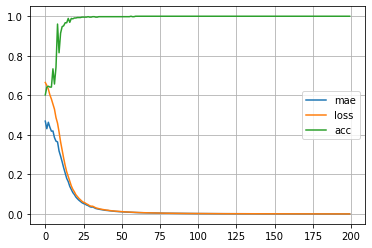

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae','loss','acc'])
plt.grid()
plt.show()